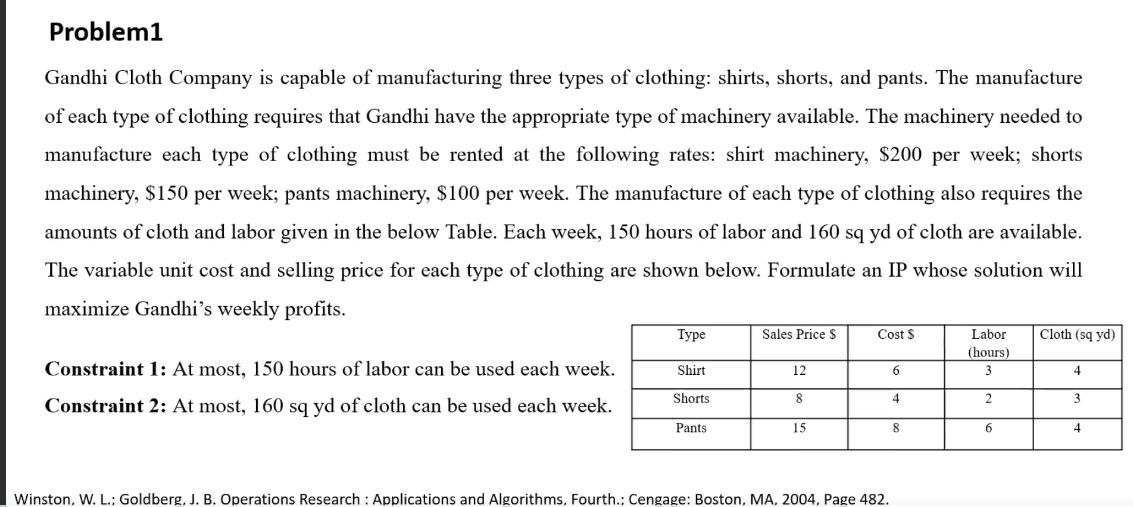

In [33]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [34]:
model=pyo.ConcreteModel()

In [35]:
#sets
model.i=pyo.Set(initialize=['Shirts', 'Shorts', 'Pants'])

#parameters
#price
model.P=pyo.Param(model.i, initialize={'Shirts':12, 'Shorts':8, 'Pants':15})
P=model.P

#operational costs
model.Co=pyo.Param(model.i, initialize={'Shirts':6, 'Shorts':4, 'Pants':8})
Co=model.Co

#machinery costs
model.F=pyo.Param(model.i, initialize={'Shirts':200, 'Shorts':150, 'Pants':100})
F=model.F

#labor ccosts
model.L=pyo.Param(model.i, initialize={'Shirts':3, 'Shorts':2, 'Pants':6})
L=model.L

#cloth costs
model.C=pyo.Param(model.i, initialize={'Shirts':4, 'Shorts':3, 'Pants':4})
C=model.C

model.M=pyo.Param(model.i, initialize={'Shirts':40, 'Shorts':53, 'Pants':25})
M=model.M

In [36]:
#decision variables

model.x=pyo.Var(model.i, domain=pyo.Integers)
x=model.x

model.y=pyo.Var(model.i, domain=pyo.Binary)
y=model.y

In [37]:
#objective function
def objective_rule(model, i):
    return sum (P[i]*x[i] for i in model.i) - sum(Co[i]*x[i] for i in model.i) - sum(F[i]*x[i] for i in model.i)

model.objf=pyo.Objective(rule=objective_rule, sense=pyo.maximize)


In [38]:
#constraints

def constraint1(model, i):
    return sum(L[i]*x[i] for i in model.i)<=150
model.Const1=pyo.Constraint(model.i, rule=constraint1)

def constraint2(model, i):
    return sum(C[i]*x[i] for i in model.i)<=160
model.Const2=pyo.Constraint(model.i, rule=constraint2)

def constraint3(model, i):
    return x[i]<=M[i]*y[i]
model.Const3=pyo.Constraint(model.i, rule=constraint3)

In [39]:
Solver=SolverFactory('cplex_direct')
results=Solver.solve(model)

    model.name="unknown";
      - termination condition: unbounded
      - message from solver: <undefined>


In [41]:
print(results)
print('Objective Function = ', model.objf())
for i in model.i:
    print(f"Number of {i} produced each week:", x[i]())


Problem: 
- Name: 
  Lower bound: 5629.0
  Upper bound: 1e+37
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 6
  Number of binary variables: 3
  Number of integer variables: 3
  Number of continuous variables: 0
  Number of nonzeros: None
  Sense: -1
Solver: 
- Name: CPLEX 22.1.1.0
  Status: warning
  Wallclock time: 0.01610422134399414
  Termination condition: unbounded
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective Function =  5629.0
Number of Shirts produced each week: -13.0
Number of Shorts produced each week: -13.0
Number of Pants produced each week: -13.0
